*PREDICT* THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS.

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')

In [4]:
!pip install keras==2.12.0
from pandas.plotting import scatter_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [7]:
from google.colab import files
uploaded = files.upload()


Saving forestfires.csv to forestfires.csv


In [8]:
forestfire = pd.read_csv('forestfires.csv')
forestfire.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [9]:
forestfire

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [10]:
forestfire.shape

(517, 31)

In [11]:
forestfire.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [12]:
forestfire.describe().T

count        mean         std   min    25%     50%     75%      max
FFMC      517.0   90.644681    5.520111  18.7   90.2   91.60   92.90    96.20
DMC       517.0  110.872340   64.046482   1.1   68.6  108.30  142.40   291.30
DC        517.0  547.940039  248.066192   7.9  437.7  664.20  713.90   860.60
ISI       517.0    9.021663    4.559477   0.0    6.5    8.40   10.80    56.10
temp      517.0   18.889168    5.806625   2.2   15.5   19.30   22.80    33.30
RH        517.0   44.288201   16.317469  15.0   33.0   42.00   53.00   100.00
wind      517.0    4.017602    1.791653   0.4    2.7    4.00    4.90     9.40
rain      517.0    0.021663    0.295959   0.0    0.0    0.00    0.00     6.40
area      517.0   12.847292   63.655818   0.0    0.0    0.52    6.57  1090.84
dayfri    517.0    0.164410    0.371006   0.0    0.0    0.00    0.00     1.00
daymon    517.0    0.143133    0.350548   0.0    0.0    0.00    0.00     1.00
daysat    517.0    0.162476    0.369244   0.0    0.0    0.00    0.00     1.00
daysun    517.0    0.183752    0.387657   0.0    0.0    0.00    0.00     1.00
daythu    517.0    0.117988    0.322907   0.0    0.0    0.00    0.00     1.00
daytue    517.0    0.123791    0.329662   0.0    0.0    0.00    0.00     1.00
daywed    517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthapr  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthaug  517.0    0.355899    0.479249   0.0    0.0    0.00    1.00     1.00
monthdec  517.0    0.017408    0.130913   0.0    0.0    0.00    0.00     1.00
monthfeb  517.0    0.038685    0.193029   0.0    0.0    0.00    0.00     1.00
monthjan  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthjul  517.0    0.061896    0.241199   0.0    0.0    0.00    0.00     1.00
monthjun  517.0    0.032882    0.178500   0.0    0.0    0.00    0.00     1.00
monthmar  517.0    0.104449    0.306138   0.0    0.0    0.00    0.00     1.00
monthmay  517.0    0.003868    0.062137   0.0    0.0    0.00    0.00     1.00
monthnov  517.0    0.001934    0.043980   0.0    0.0    0.00    0.00     1.00
monthoct  517.0    0.029014    0.168007   0.0    0.0    0.00    0.00     1.00
monthsep  517.0    0.332689    0.471632   0.0    0.0    0.00    1.00     1.00

In [13]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [14]:
forestfire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [15]:
forestfire[forestfire.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [16]:
forestfire[forestfire.duplicated()].shape

(8, 31)

In [17]:
# List of Numerical Variables
numerical_features=[feature for feature in forestfire.columns if forestfire[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
forestfire[numerical_features].head()

Number of numerical variables: 28


FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthdec  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  
0         0         0  
1         1         0  
2         1         0  
3         0         0  
4         0         0  

[5 rows x 28 columns]

In [18]:
discrete_feature=[feature for feature in numerical_features if len(forestfire[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [20]:
categorical = [var for var in forestfire.columns if forestfire[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [21]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(forestfire[var].value_counts())



aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [22]:
# view frequency distribution of categorical variables

for var in categorical:

    print(forestfire[var].value_counts()/np.float(len(forestfire)))



aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


<ipython-input-22-5b8c5678e140>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(forestfire[var].value_counts()/np.float(len(forestfire)))
<ipython-input-22-5b8c5678e140>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(forestfire[var].value_counts()/np.float(len(forestfire)))
<ipython-input-22-5b8c5678e140>:5: DeprecationWarn

In [23]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(forestfire[var].unique()), ' labels')



month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [24]:
forestfire.corr()

<ipython-input-24-ee02344aa4fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  forestfire.corr()


FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC       0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC        0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI       0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp      0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH       -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind     -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain      0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area      0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri    0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon   -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat   -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun   -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu    0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue    0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed    0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug  0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul  0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep  0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   

              wind      rain      area    dayfri  ...  monthdec  monthfeb  \
FFMC     -0.028485  0.056702  0.040122  0.019306  ... -0.137044 -0.281535   
DMC      -0.105342  0.074790  0.072994 -0.012010  ... -0.176301 -0.317899   
DC       -0.203466  0.035861  0.049383 -0.004220  ... -0.105642 -0.399277   
ISI       0.106826  0.067668  0.008258  0.046695  ... -0.162322 -0.249777   
temp     -0.227116  0.069491  0.097844 -0.071949  ... -0.329648 -0.320015   
RH        0.069410  0.099751 -0.075519  0.064506  ... -0.047714  0.140430   
wind      1.000000  0.061119  0.012317  0.118090  ...  0.269702 -0.029431   
rain      0.061119  1.000000 -0.007366 -0.004261  ... -0.009752 -0.014698   
area      0.012317 -0.007366  1.000000 -0.052911  ...  0.001010 -0.020732   
dayfri    0.118090 -0.004261 -0.052911  1.000000  ... -0.019140  0.046323   
daymon   -0.063881 -0.029945 -0.021206 -0.181293  ...  0.114519  0.003933   
daysat   -0.063799 -0.032271  0.087868 -0.195372  ... -0.058625  0.020406   
daysun    0.027981 -0.017872 -0.020463 -0.210462  ... -0.024966  0.008416   
daythu   -0.062553 -0.026798  0.020121 -0.162237  ... -0.002838 -0.042278   
daytue    0.053396  0.139311 -0.001333 -0.166728  ... -0.005125 -0.014491   
daywed   -0.019965 -0.020744 -0.011452 -0.151487  ...  0.002899 -0.035713   
monthapr  0.048266 -0.009752 -0.008280 -0.019140  ... -0.017717 -0.026701   
monthaug  0.028577  0.093101 -0.004187 -0.100837  ... -0.098941 -0.149116   
monthdec  0.269702 -0.009752  0.001010 -0.019140  ...  1.000000 -0.026701   
monthfeb -0.029431 -0.014698 -0.020732  0.046323  ... -0.026701  1.000000   
monthjan -0.070245 -0.004566 -0.012589 -0.027643  ... -0.008295 -0.012501   
monthjul -0.040645 -0.013390  0.006149 -0.048969  ... -0.034190 -0.051528   
monthjun  0.012124 -0.013510 -0.020314  0.006000  ... -0.024543 -0.036989   
monthmar  0.181433 -0.020744 -0.045596  0.036205  ... -0.045456 -0.068508   


<ipython-input-25-1f5626443b75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forestfire.corr(), annot=True);


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep')])

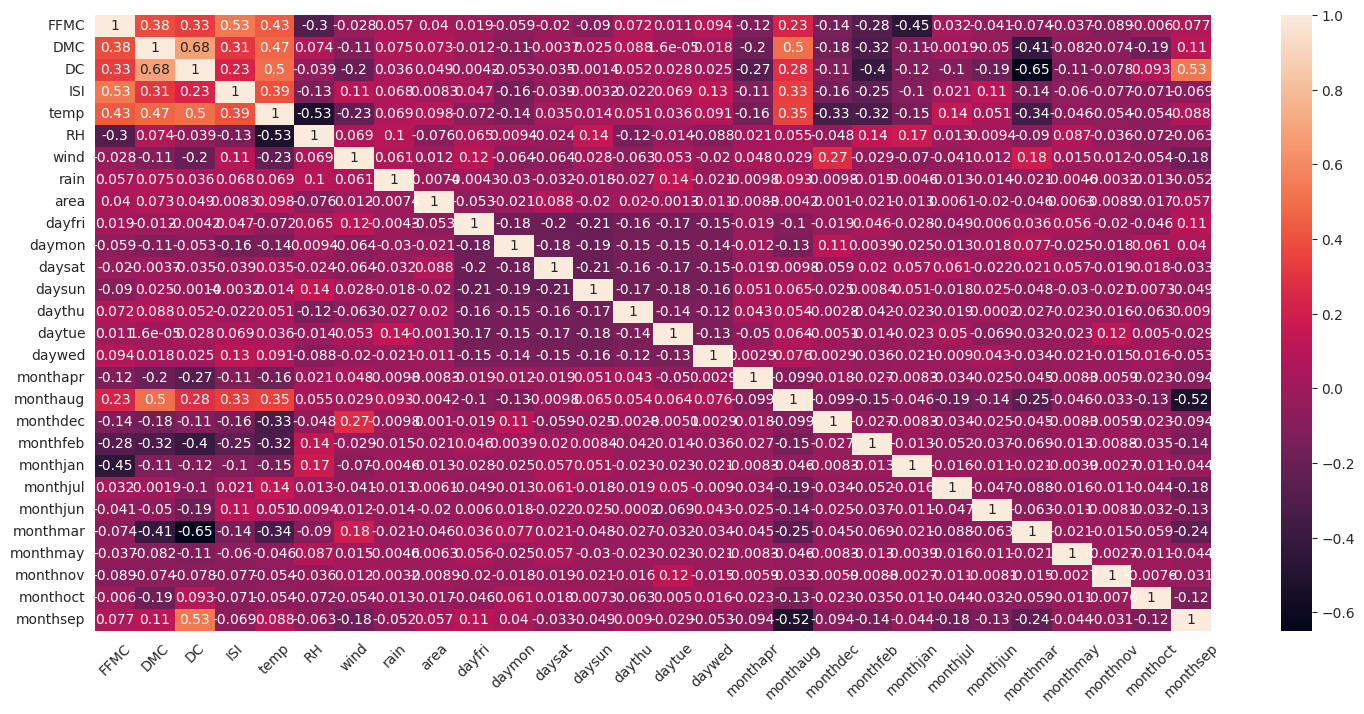

In [25]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(forestfire.corr(), annot=True);
plt.xticks(rotation=45)

In [26]:
sns.set_style('darkgrid')
sns.pairplot(forestfire, hue='size_category')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-27-d7f7a80d519a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfire[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


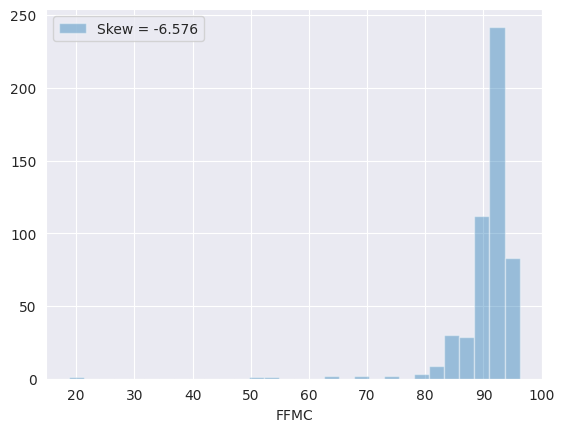

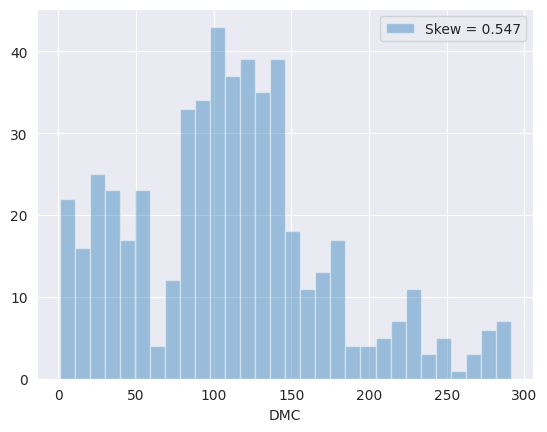

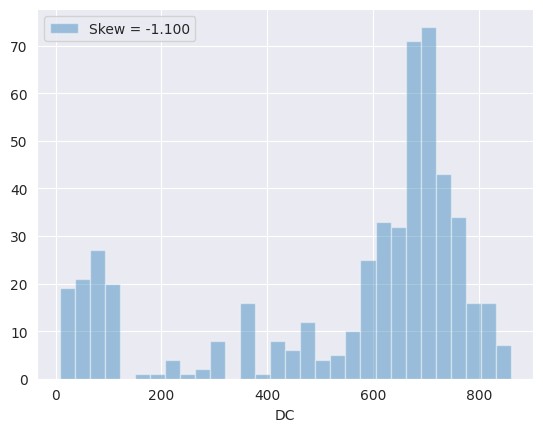

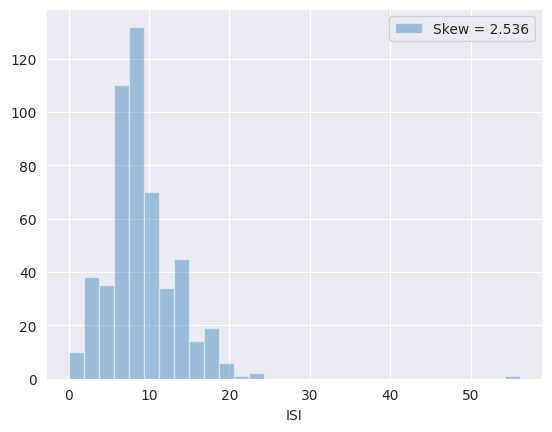

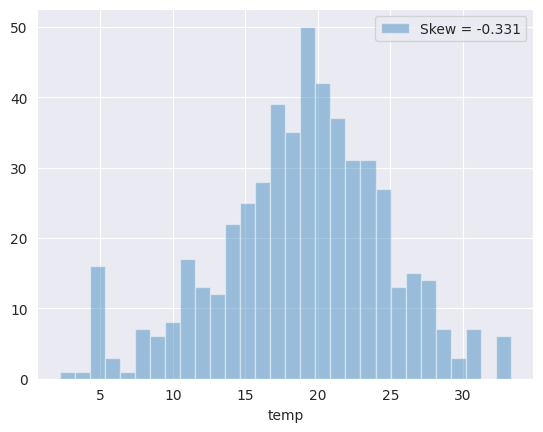

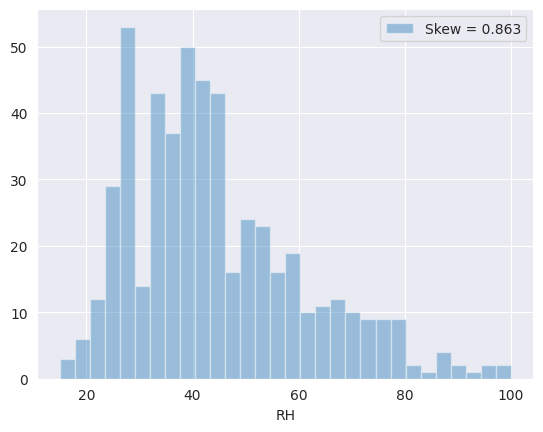

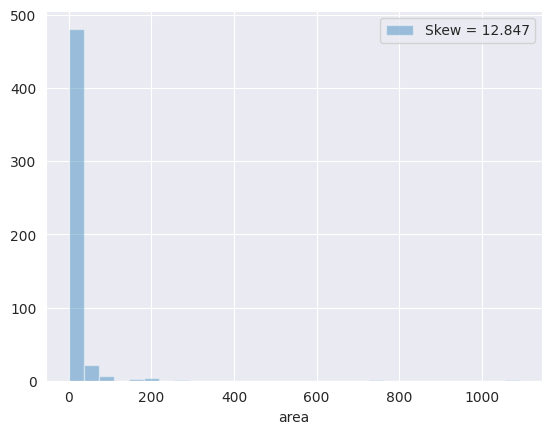

In [27]:
for feat in continuous_feature:
    skew = forestfire[feat].skew()
    sns.distplot(forestfire[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [41]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(forestfire[continuous_feature]))))



The dataset contains 3 observations with more than 2 outliers


In [29]:
continuous_feature

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

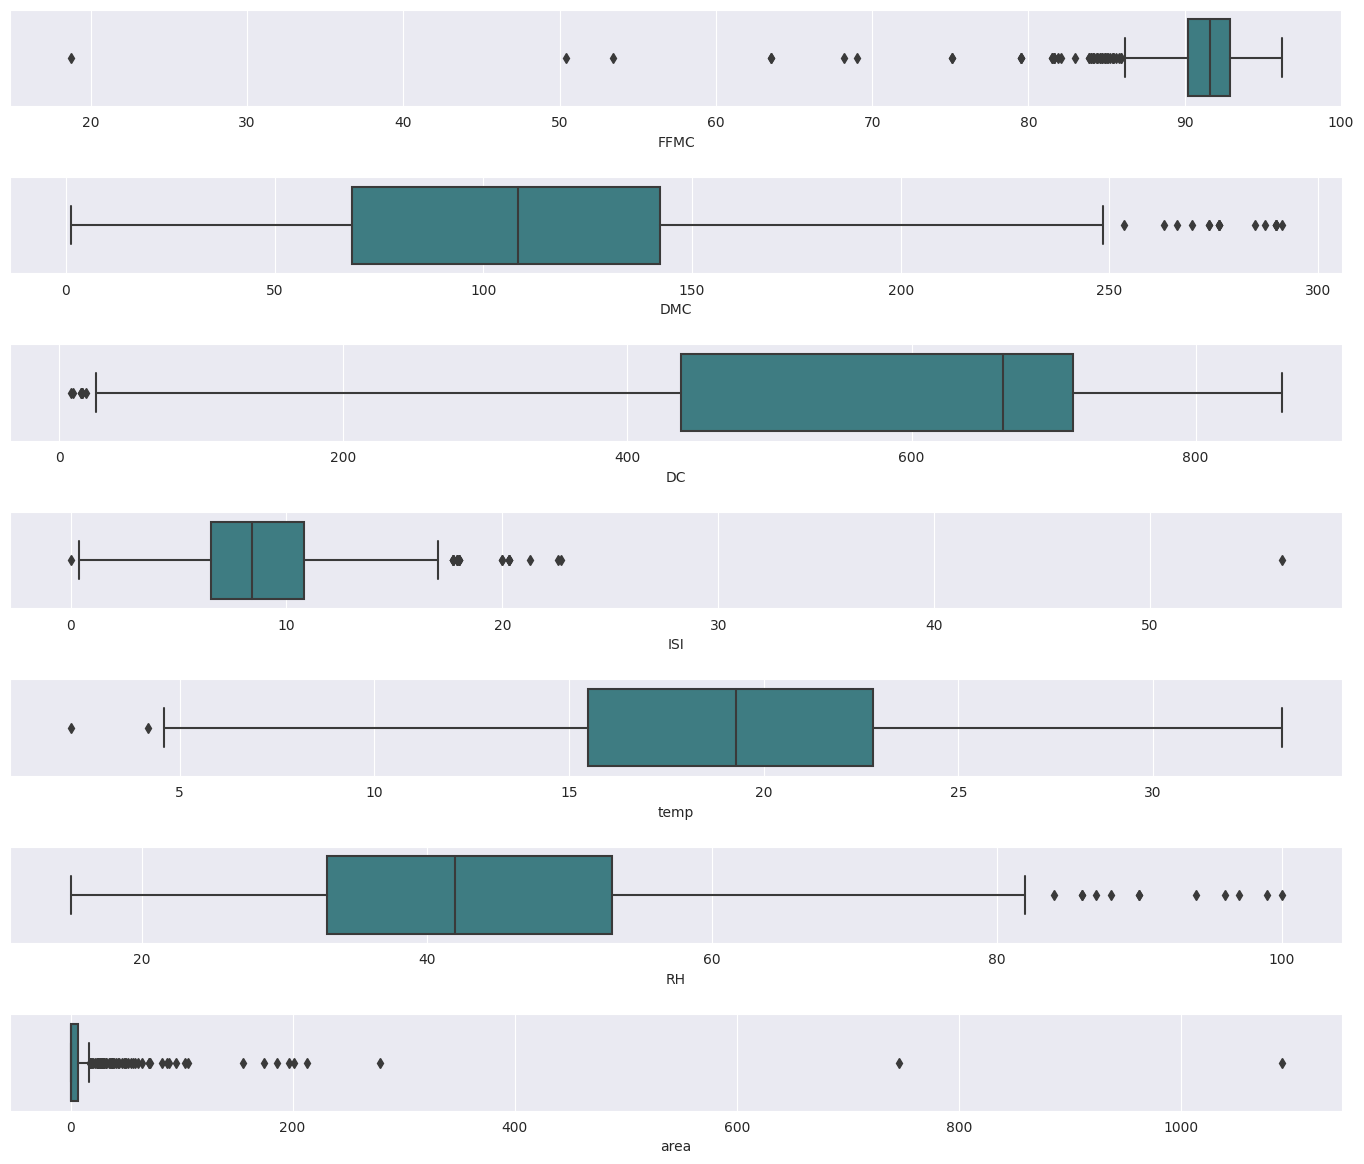

In [30]:
ot=forestfire.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

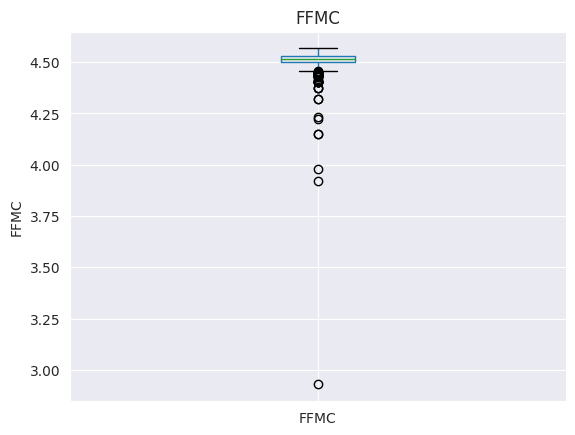

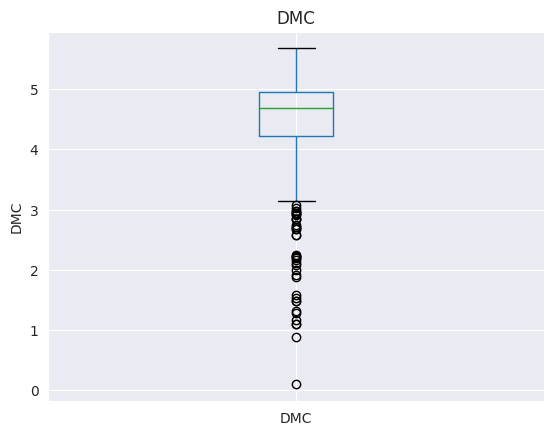

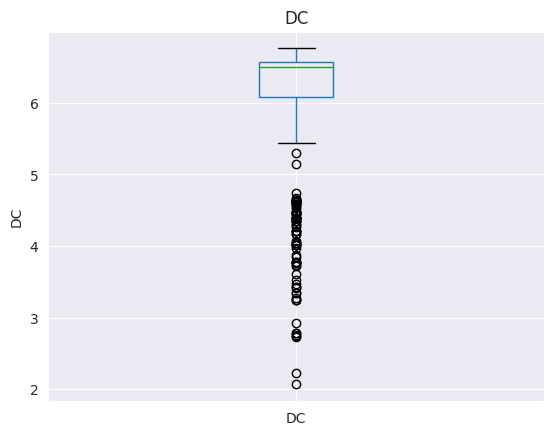

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


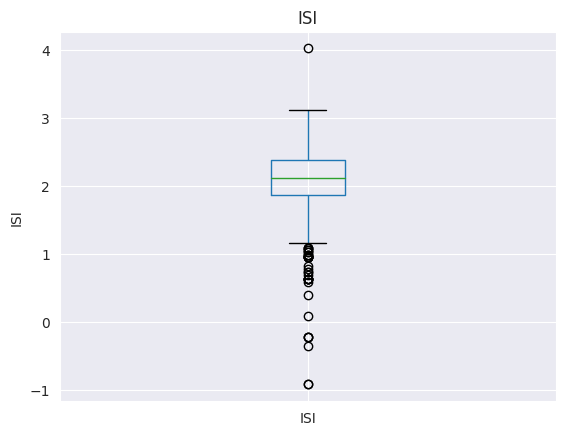

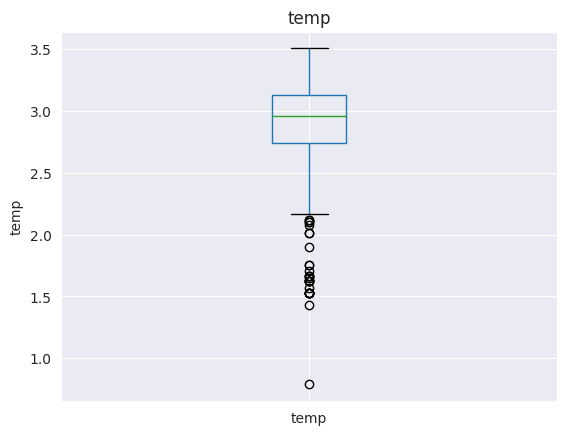

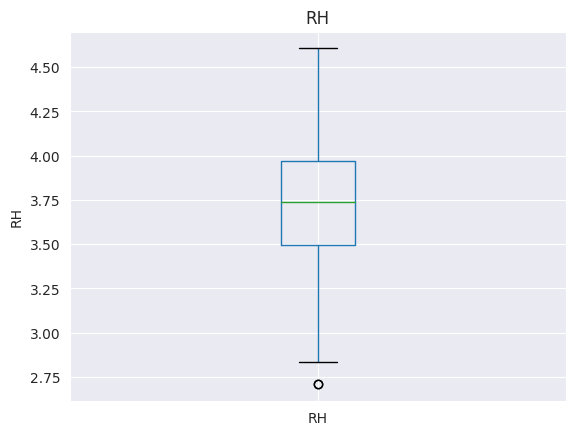

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1257: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1264: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1272: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


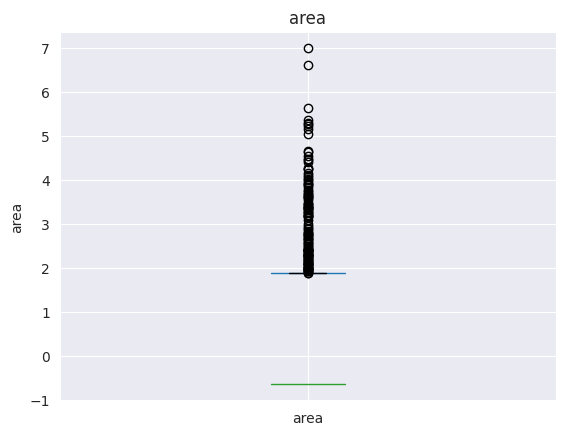

In [31]:
for feature in continuous_feature:
    data=forestfire.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


<ipython-input-32-c7148df318a2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(forestfire['area'],shade=True,color='g')


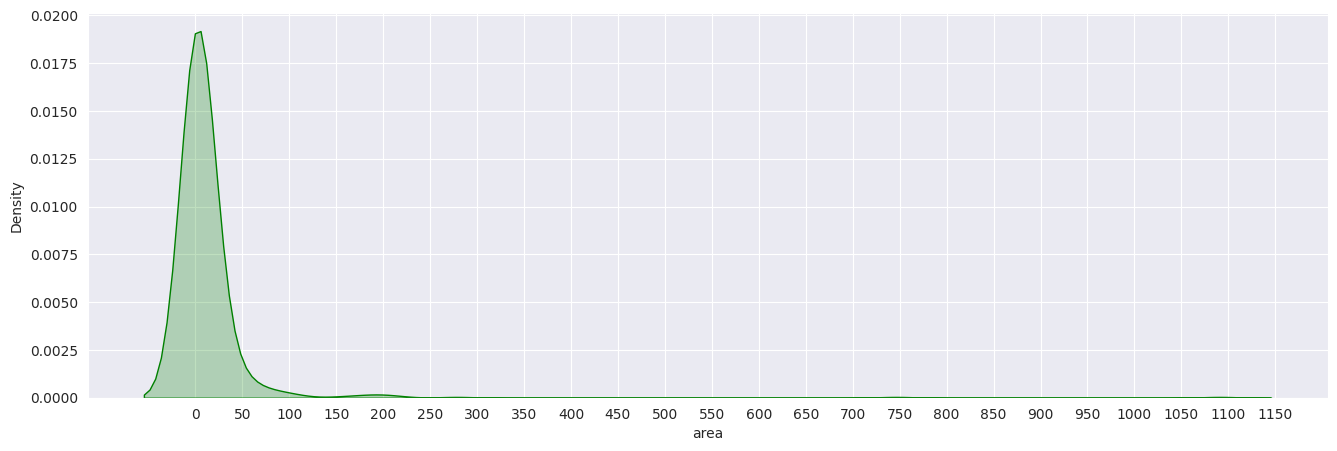

In [32]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forestfire['area'].skew()))
print("Kurtosis: {}".format(forestfire['area'].kurtosis()))
ax = sns.kdeplot(forestfire['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()


Few observations:

    The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

    It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

    We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

    Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)



In [33]:
categorical_features=[feature for feature in forestfire.columns if forestfire[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
forestfire[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


month  day size_category
0   mar  fri         small
1   oct  tue         small
2   oct  sat         small
3   mar  fri         small
4   mar  sun         small

In [34]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(forestfire[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [35]:
# Decide which categorical variables you want to use in model
for feature in forestfire.columns:
    if forestfire[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(forestfire[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(forestfire[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



NameError: ignored

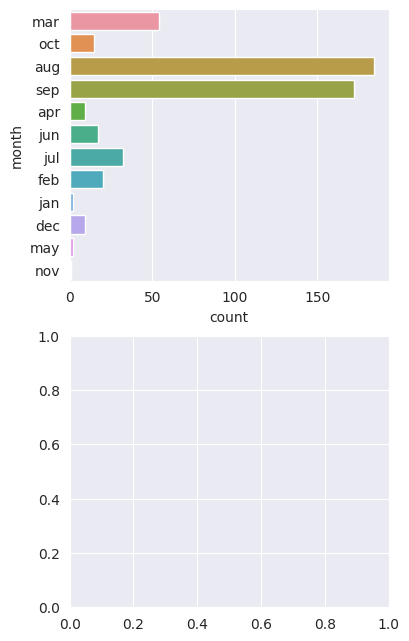

In [36]:
# analyzing categorical columns
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=forestfire,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [42]:
print(forestfire['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=forestfire.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()



count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthjan  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  \
0         0         0         1         0         0         0         0   
1         0         0         0         0         0         1         0   
2         0         0         0         0         0         1         0   
3         0         0         1         0         0         0         0   
4         0         0         1         0         0         0         0   

   size_category  damage_category  
0          small        No damage  
1          small        No damage  
2          small        No damage  
3          small        No damage  
4          small        No damage  

[5 rows x 32 columns]

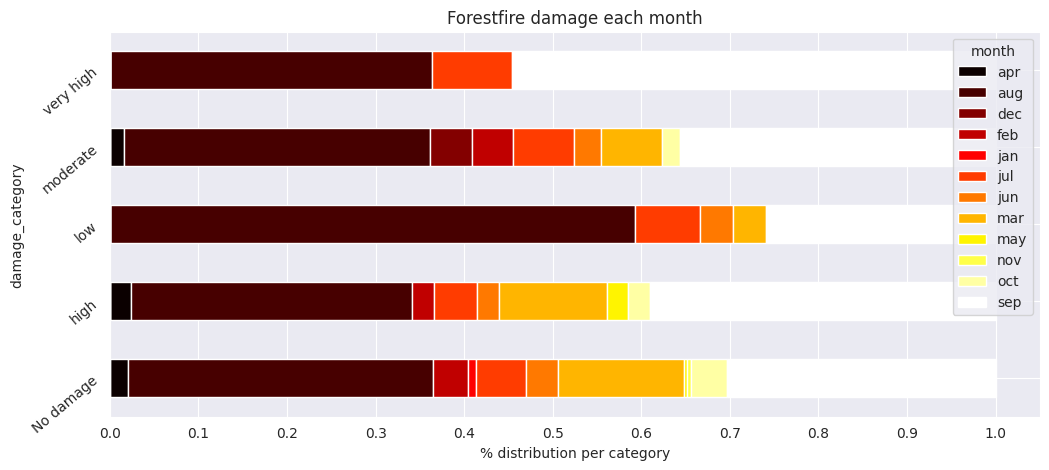

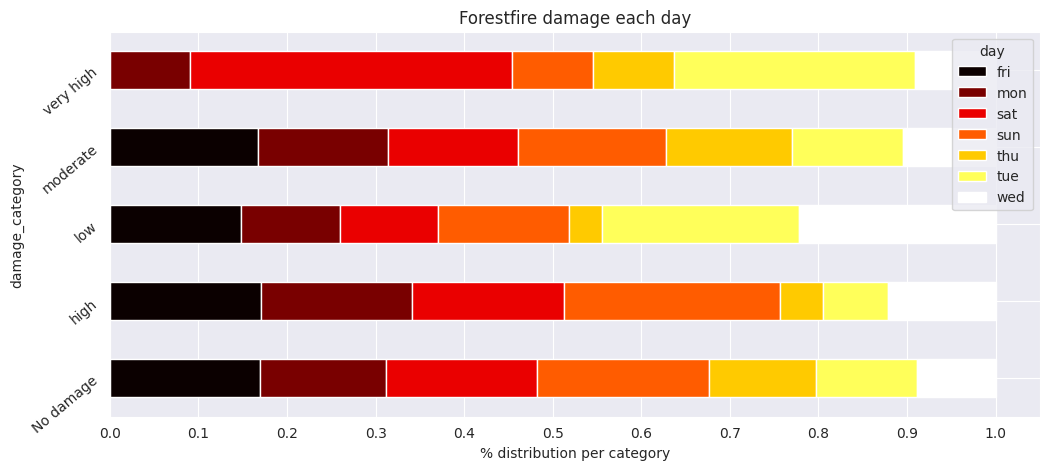

In [43]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))

plt.show()

[Text(0.5, 1.0, 'Month Vs Temp Barplot'),
 Text(0.5, 0, 'Months'),
 Text(0, 0.5, 'Temperature')]

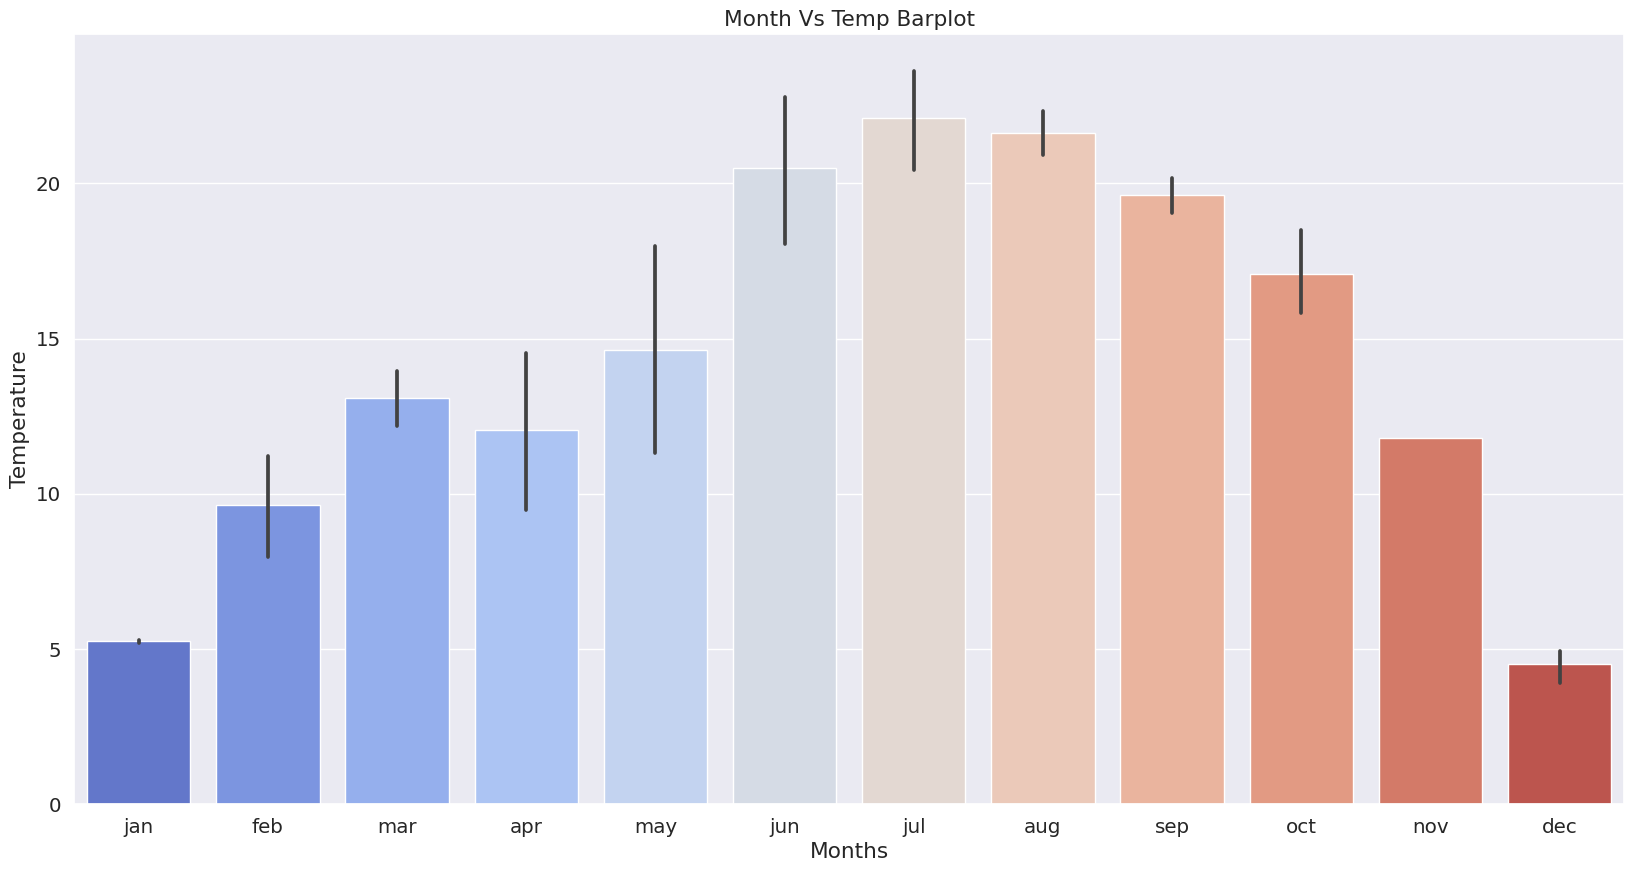

In [44]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = forestfire,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature")

KeyError: ignored

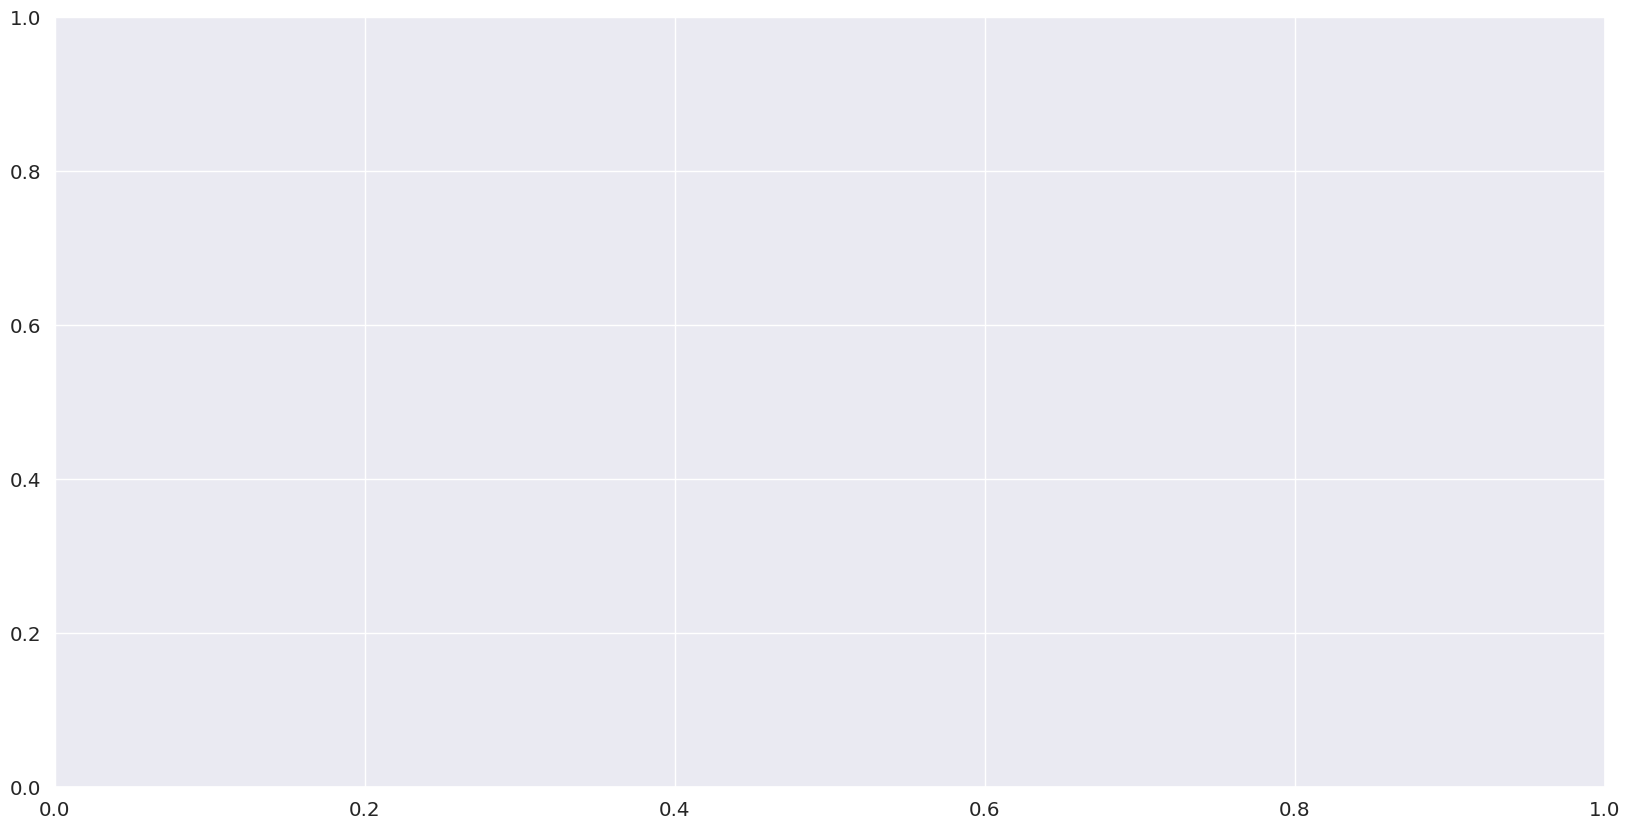

In [47]:
forestfire.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300) # scatter plot for the dataset

KeyError: ignored

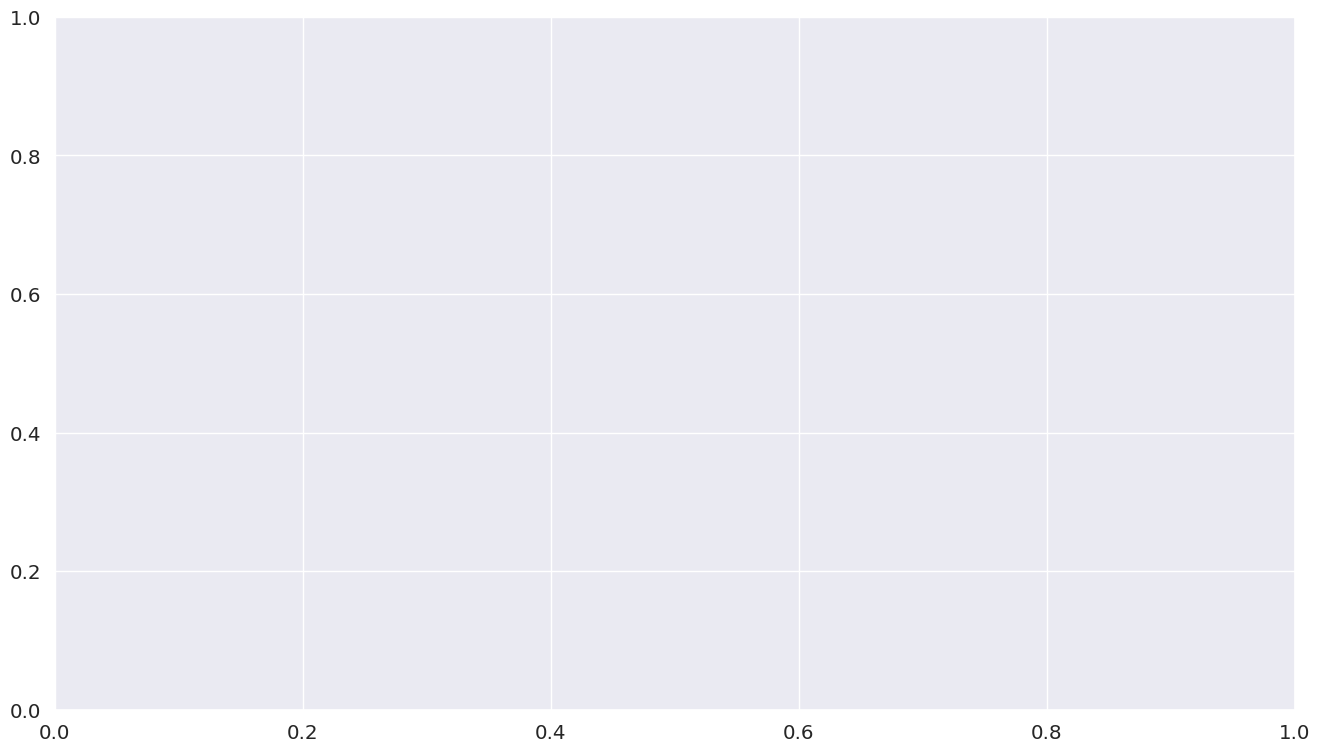

In [48]:
# Analysis of Burnt area based on spatial cordinates(X,Y)
forestfire.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*forestfire['area'],figsize=(16,9))
plt.xlabel('X cordinates of park',color='red',fontsize=15)
plt.ylabel('Y cordinates of park',color='red',fontsize=15)
plt.title('Burnt area in different regions of the park',color='blue',fontsize=18)

In [37]:
forestfire

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]